In [63]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import imblearn.combine as combine
import imblearn.over_sampling as over
import imblearn.under_sampling as under

In [64]:
data_df = pd.read_csv("data_processing/data/processed.csv", header=None)

data_df.columns = data_df.iloc[0]
data_df = data_df.iloc[1:]

data_df = data_df.apply(pd.to_numeric)
print(data_df.columns)
print(data_df.shape)
data_df.head()

Index(['Age', 'Education', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore',
       'Impulsive', 'SS', 'country_Canada', 'country_New_Zealand',
       'country_Other', 'country_Republic_of_Ireland', 'country_UK',
       'country_USA', 'country_Australia', 'gender_F', 'gender_M', 'eth_Black',
       'eth_Mixed-Black/Asian', 'eth_Mixed-White/Asian',
       'eth_Mixed-White/Black', 'eth_Other', 'eth_White', 'eth_Asian',
       'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
      dtype='object', name=0)
(1876, 43)


,Age,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,country_Canada,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1,2,9,0.413474,0.796106,0.762567,0.609827,0.479394,0.337920,0.465658,0,...,0,1,0,0,0,0,1,0,1,0
2,3,5,0.444788,0.622976,0.392939,0.266061,0.353580,0.215401,0.619957,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8,0.492045,0.376883,0.527023,0.585213,0.584415,0.215401,0.224398,0,...,0,0,0,0,0,0,0,0,0,0
4,3,9,0.623275,0.250544,0.456995,0.456454,0.688508,0.428474,0.465658,0,...,0,0,0,0,0,0,0,0,0,0
5,6,4,0.413474,0.454133,0.278311,0.794386,0.735380,0.215401,0.132468,1,...,0,0,0,0,0,0,0,0,1,0


In [65]:
results = [] # storing metrics for graphing later

In [66]:
X = data_df.iloc[:,0:24]
Y = data_df.iloc[:,25:]

print(X.shape)
print(Y.shape)



(1876, 24)
(1876, 18)


MLP

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters for Cannabis: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.01, 'solver': 'adam'}

 Unbalanced results for Cannabis
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       167
           1       0.83      0.83      0.83       209

    accuracy                           0.81       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.81      0.81      0.81       376


 Unbalanced Train results for Cannabis
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       718
           1       0.82      0.81      0.82       782

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500


 Balanced results for Cannabis
              precision    reca

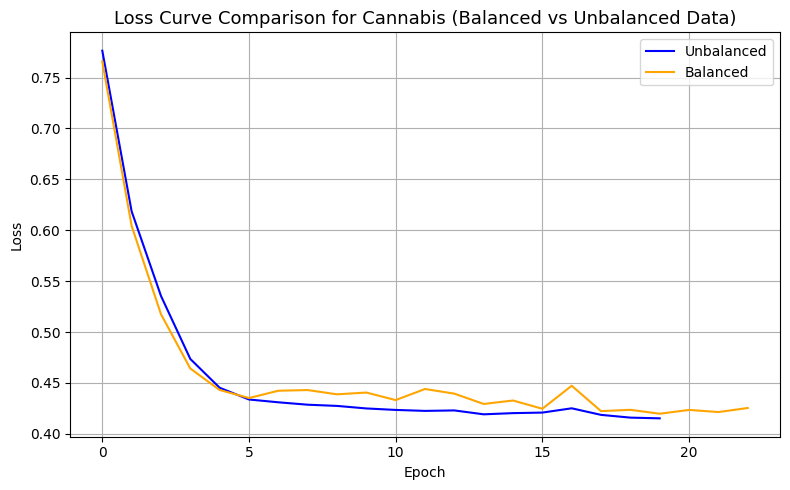

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters for Heroin: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.01, 'solver': 'adam'}

 Unbalanced results for Heroin
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       345
           1       0.00      0.00      0.00        31

    accuracy                           0.92       376
   macro avg       0.46      0.50      0.48       376
weighted avg       0.84      0.92      0.88       376


 Unbalanced Train results for Heroin
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1413
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1500
   macro avg       0.47      0.50      0.49      1500
weighted avg       0.89      0.94      0.91      1500


 Balanced results for Heroin
              precision    recall  f1-s

/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

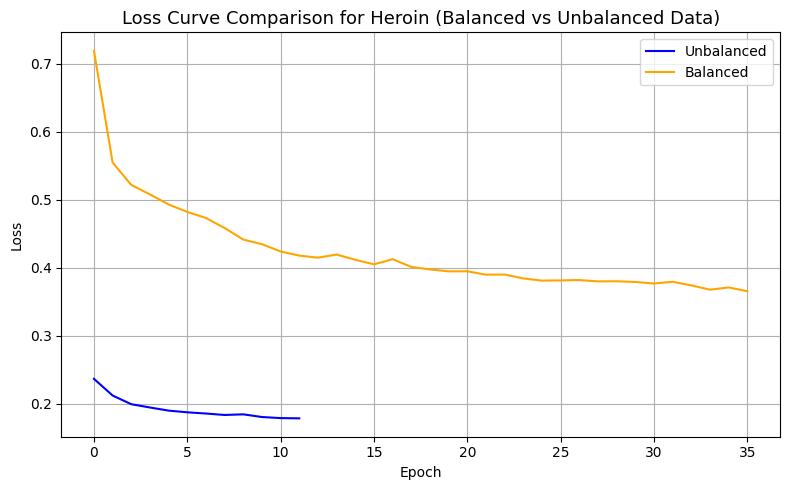

In [67]:
for drug in ["Cannabis", "Heroin"]:
    y = data_df[drug]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    indices = []
    for i in range(23):
        indices.append(i)

    X_train_res, y_train_res = over.RandomOverSampler().fit_resample(X_train, y_train)

    # for gridsearchcv (optimizing hyperparameters)
    param_grid = {
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.1],
        'solver': ['adam'],
        'learning_rate_init': [0.001, 0.01],
        'hidden_layer_sizes': [
            (32,), (16,),
        ]
    }

    # ensure that every fold countains minority
    cv = StratifiedKFold(n_splits=5, shuffle=True)

    grid = GridSearchCV(
        estimator = MLPClassifier(max_iter=1000, early_stopping=True),
        param_grid = param_grid,
        scoring = 'recall_macro',
        cv = cv,
        verbose = 1,
        n_jobs = 1
    )

    # finding best param
    grid.fit(X_train_res, y_train_res)
    best_params = grid.best_params_
    print(f"\nBest hyperparameters for {drug}: {best_params}")

    # models based on best params
    unbalanced_model = MLPClassifier(**best_params, max_iter = 1000, early_stopping = True)
    unbalanced_model.fit(X_train, y_train)
    y_pred_unbalanced = unbalanced_model.predict(X_test)
    report_unbalanced = classification_report(y_test, y_pred_unbalanced, output_dict=True)
    print(f"\n Unbalanced results for {drug}")
    print(classification_report(y_test, y_pred_unbalanced))

    y_train_pred_unbalanced = unbalanced_model.predict(X_train)
    print(f"\n Unbalanced Train results for {drug}")
    print(classification_report(y_train, y_train_pred_unbalanced))

    # store metrics
    results.append({
        'Drug': drug,
        'Model': 'MLP',
        'Balance': 'Unbalanced',
        'Recall_macro': report_unbalanced['macro avg']['recall'],
        'f1_macro': report_unbalanced['macro avg']['f1-score']
    })

    balanced_model = MLPClassifier(**best_params, max_iter = 1000, early_stopping = True)
    balanced_model.fit(X_train_res, y_train_res)
    y_pred_balanced = balanced_model.predict(X_test)
    report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)
    print(f"\n Balanced results for {drug}")
    print(classification_report(y_test, y_pred_balanced))

    y_train_pred_balanced = balanced_model.predict(X_train_res)
    print(f"\n Balanced Train results for {drug}")
    print(classification_report(y_train_res, y_train_pred_balanced))

    results.append({
            'Drug': drug,
            'Model': 'MLP',
            'Balance': 'Balanced',
            'Recall_macro': report_balanced['macro avg']['recall'],
            'f1_macro': report_balanced['macro avg']['f1-score']
    })

    # plotting
    plt.figure(figsize=(8, 5))

    plt.plot(unbalanced_model.loss_curve_, label='Unbalanced', linestyle='-', color='blue')
    plt.plot(balanced_model.loss_curve_, label='Balanced', linestyle='-', color='orange')

    plt.title(f"Loss Curve Comparison for {drug} (Balanced vs Unbalanced Data)", fontsize=13)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    

In [68]:
for drug in ["Cannabis", "Heroin"]:
    y = data_df[drug]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    # resampling
    indices = []
    for i in range(23):
        indices.append(i)

    X_train_res, y_train_res = over.SMOTENC(categorical_features=indices).fit_resample(X_train, y_train)


    model = RandomForestClassifier(class_weight='balanced')

    # gridsearch
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [2],
        'min_samples_split': [10, 20, 40],
        'min_samples_leaf': [5, 10]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True)

    grid = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        scoring = 'recall_macro',
        cv = cv,
        verbose = 1,
        n_jobs = 1
    )

    grid.fit(X_train_res, y_train_res)
    best_params = grid.best_params_
    print(f"\nBest hyperparameters for {drug}: {best_params}")

    # models
    unbalanced_model = RandomForestClassifier(**best_params, class_weight='balanced')
    unbalanced_model.fit(X_train, y_train)
    y_pred_unbalanced = unbalanced_model.predict(X_test)
    unbalanced_report = classification_report(y_test, y_pred_unbalanced, output_dict=True)
    print(f"\n Unbalanced results for {drug}")
    print(classification_report(y_test, y_pred_unbalanced))

    y_train_pred_unbalanced = unbalanced_model.predict(X_train)
    print(f"\n Unbalanced Train results for {drug}")
    print(classification_report(y_train, y_train_pred_unbalanced))

    results.append({
        'Drug': drug,
        'Model': 'Random Forest',
        'Balance': 'Unbalanced',
        'Recall_macro': unbalanced_report['macro avg']['recall'],
        'f1_macro': unbalanced_report['macro avg']['f1-score']
    })

    balanced_model = RandomForestClassifier(**best_params, class_weight='balanced')
    balanced_model.fit(X_train_res, y_train_res)
    y_pred_balanced = balanced_model.predict(X_test)
    balanced_report = classification_report(y_test, y_pred_balanced, output_dict=True)
    print(f"\n Balanced results for {drug}")
    print(classification_report(y_test, y_pred_balanced))

    y_train_pred_balanced = balanced_model.predict(X_train_res)
    print(f"\n Balanced Train results for {drug}")
    print(classification_report(y_train_res, y_train_pred_balanced))
    
    results.append({
        'Drug': drug,
        'Model': 'Random Forest',
        'Balance': 'Balanced',
        'Recall_macro': balanced_report['macro avg']['recall'],
        'f1_macro': balanced_report['macro avg']['f1-score']
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best hyperparameters for Cannabis: {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}

 Unbalanced results for Cannabis
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       167
           1       0.87      0.78      0.82       209

    accuracy                           0.81       376
   macro avg       0.81      0.82      0.81       376
weighted avg       0.82      0.81      0.81       376


 Unbalanced Train results for Cannabis
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       718
           1       0.86      0.77      0.81       782

    accuracy                           0.81      1500
   macro avg       0.82      0.81      0.81      1500
weighted avg       0.82      0.81      0.81      1500


 Balanced results for Cannabis
              precision    recall  f1-score   support

  

In [69]:
for drug in ["Cannabis", "Heroin"]:
    y = data_df[drug]

    # data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

    indices = []
    for i in range(23):
        indices.append(i)

    # use SMOTE and tomek links to resample
    X_train_res, y_train_res = over.RandomOverSampler().fit_resample(X_train, y_train)


    model = LogisticRegression(max_iter=1000)

    # gridsearch
    param_grid = {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs'],
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True)

    grid = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        scoring = 'recall_macro',
        cv = cv,
        verbose = 1,
        n_jobs = 1
    )

    grid.fit(X_train_res, y_train_res)
    best_params = grid.best_params_
    print(f"\nBest hyperparameters for {drug}: {best_params}")

    # models
    unbalanced_model = LogisticRegression(**best_params, max_iter = 1000)
    unbalanced_model.fit(X_train, y_train)
    y_pred_unbalanced = unbalanced_model.predict(X_test)
    report_unbalanced = classification_report(y_test, y_pred_unbalanced, output_dict=True)
    print(f"\n Unbalanced results for {drug}")
    print(classification_report(y_test, y_pred_unbalanced))

    y_train_pred_unbalanced = unbalanced_model.predict(X_train)
    print(f"\n Unbalanced Train results for {drug}")
    print(classification_report(y_train, y_train_pred_unbalanced))

    results.append({
        'Drug': drug,
        'Model': 'Logistic Regression',
        'Balance': 'Unbalanced',
        'Recall_macro': report_unbalanced['macro avg']['recall'],
        'f1_macro': report_unbalanced['macro avg']['f1-score']
    })

    balanced_model = LogisticRegression(**best_params, max_iter = 1000)
    balanced_model.fit(X_train_res, y_train_res)
    y_pred_balanced = balanced_model.predict(X_test)
    report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)
    print(f"\n Balanced results for {drug}")
    print(classification_report(y_test, y_pred_balanced))

    y_train_pred_balanced = balanced_model.predict(X_train_res)
    print(f"\n Balanced Train results for {drug}")
    print(classification_report(y_train_res, y_train_pred_balanced))
    
    results.append({
        'Drug': drug,
        'Model': 'Logistic Regression',
        'Balance': 'Balanced',
        'Recall_macro': report_balanced['macro avg']['recall'],
        'f1_macro': report_balanced['macro avg']['f1-score']
    })
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameters for Cannabis: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

 Unbalanced results for Cannabis
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       167
           1       0.86      0.83      0.85       209

    accuracy                           0.83       376
   macro avg       0.83      0.83      0.83       376
weighted avg       0.83      0.83      0.83       376


 Unbalanced Train results for Cannabis
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       718
           1       0.84      0.79      0.82       782

    accuracy                           0.81      1500
   macro avg       0.82      0.82      0.81      1500
weighted avg       0.82      0.81      0.81      1500


 Balanced results for Cannabis
              precision    recall  f1-score   support

           0       0.79      0.84      0.81 

/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andrewchen/Desktop/SubstanceAbuseRiskAssessmentML/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

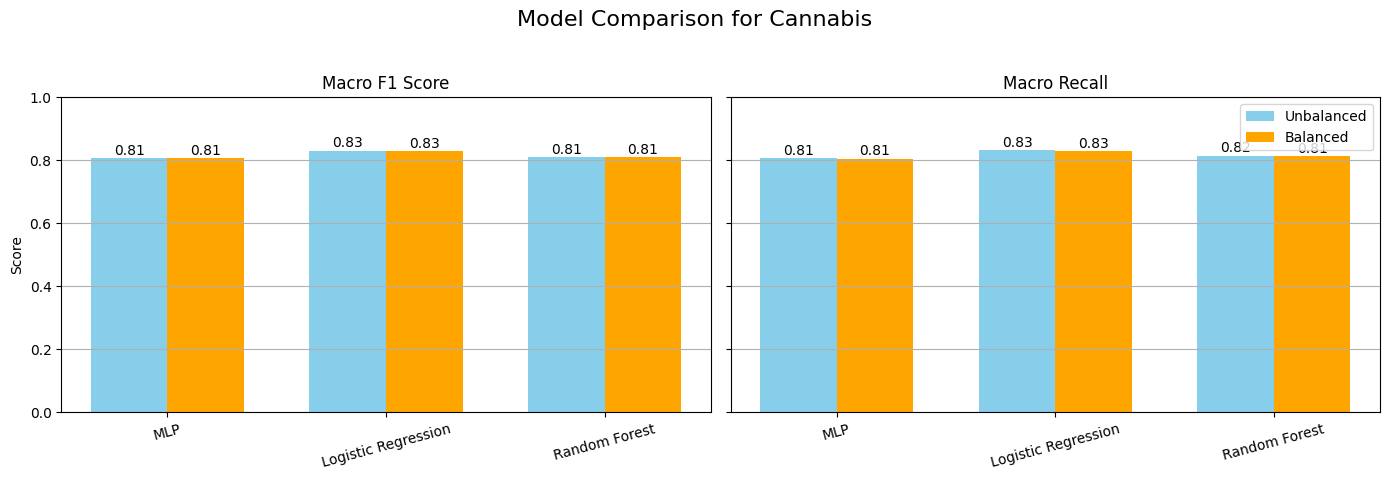

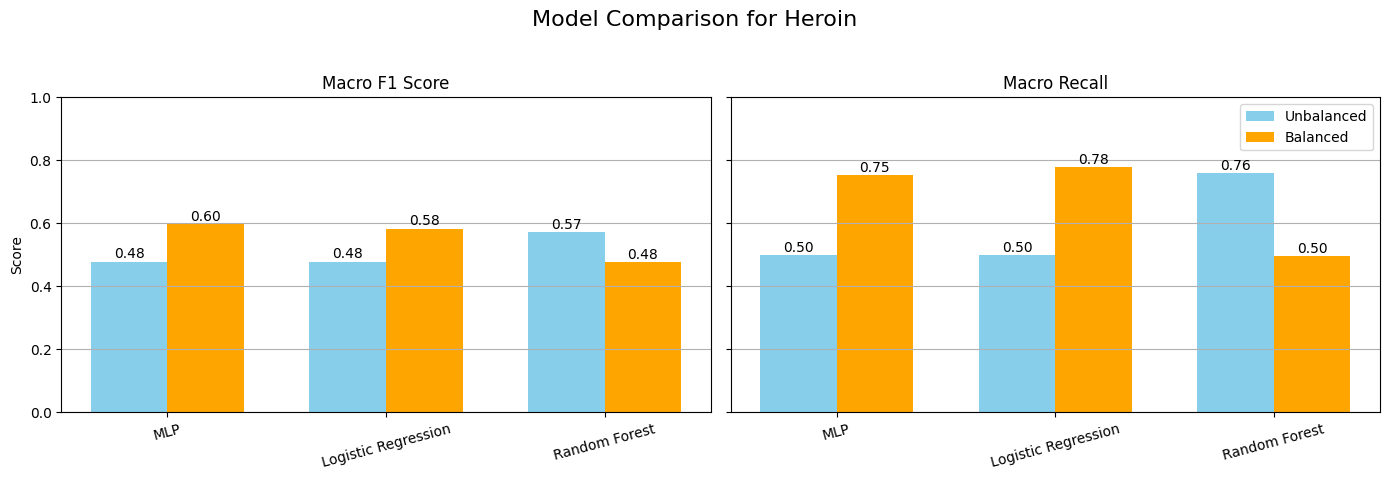

In [70]:
# plotting metrics of all 6 models for each drug
df_results = pd.DataFrame(results)

drugs = ["Cannabis", "Heroin"]
models = ["MLP", "Logistic Regression", "Random Forest"]
balances = ["Unbalanced", "Balanced"]

for drug in drugs:
    df_drug = df_results[df_results["Drug"] == drug]

    x = np.arange(len(models))
    width = 0.35

    f1_unbalanced = []
    f1_balanced = []
    recall_unbalanced = []
    recall_balanced = []

    for model in models:
        for balance in balances:
            row = df_drug[(df_drug["Model"] == model) & (df_drug["Balance"] == balance)]
            if balance == "Unbalanced":
                f1_unbalanced.append(row["f1_macro"].values[0] if not row.empty else 0)
                recall_unbalanced.append(row["Recall_macro"].values[0] if not row.empty else 0)
            else:
                f1_balanced.append(row["f1_macro"].values[0] if not row.empty else 0)
                recall_balanced.append(row["Recall_macro"].values[0] if not row.empty else 0)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # f1 chart
    axs[0].bar(x - width/2, f1_unbalanced, width, label="Unbalanced", color='skyblue')
    axs[0].bar(x + width/2, f1_balanced, width, label="Balanced", color='orange')
    axs[0].set_title("Macro F1 Score")
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(models, rotation=15)
    axs[0].set_ylim(0, 1)
    axs[0].grid(axis='y')

    for i in range(len(models)):
        axs[0].text(x[i] - width/2, f1_unbalanced[i] + 0.01, f"{f1_unbalanced[i]:.2f}", ha='center')
        axs[0].text(x[i] + width/2, f1_balanced[i] + 0.01, f"{f1_balanced[i]:.2f}", ha='center')

    # recall chart
    axs[1].bar(x - width/2, recall_unbalanced, width, label="Unbalanced", color='skyblue')
    axs[1].bar(x + width/2, recall_balanced, width, label="Balanced", color='orange')
    axs[1].set_title("Macro Recall")
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(models, rotation=15)
    axs[1].grid(axis='y')

    for i in range(len(models)):
        axs[1].text(x[i] - width/2, recall_unbalanced[i] + 0.01, f"{recall_unbalanced[i]:.2f}", ha='center')
        axs[1].text(x[i] + width/2, recall_balanced[i] + 0.01, f"{recall_balanced[i]:.2f}", ha='center')

    # titles/labels
    fig.suptitle(f"Model Comparison for {drug}", fontsize=16)
    axs[0].set_ylabel("Score")
    axs[1].legend(loc='upper right')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()